In [1]:
# Library Imports
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import time
import sys
import keras.layers as layers
import pandas as pd


c:\Users\tayfa\Desktop\Python CUDA Env\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Datasets


--- MNIST DATA ---
MNIST DATA DIMENSIONS: (60000, 28, 28) (Count, Height, Width)


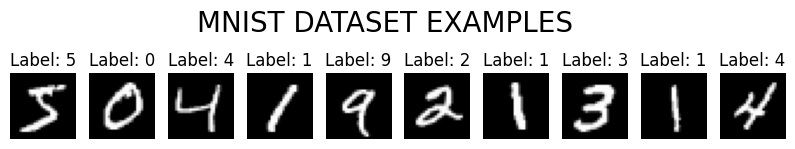


--- CIFAR-10 DATA ---
CIFAR-10 DATA DIMENSIONS: (50000, 32, 32, 3) (Count, Height, Width, Channels)


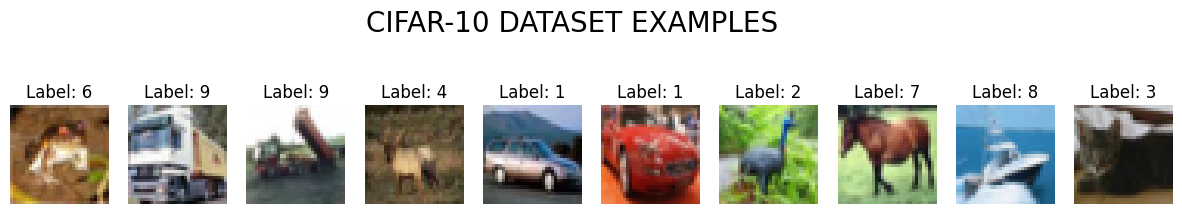


--- CIFAR-100 DATA ---
CIFAR-100 DATA DIMENSIONS: (50000, 32, 32, 3) (Count, Height, Width, Channels)


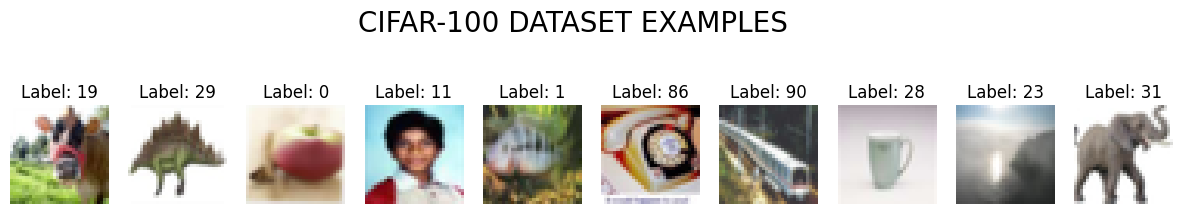


--- Cats vs Dogs DATA ---
Cats vs Dogs DATASET: cats_vs_dogs
Labels: ['cat', 'dog']


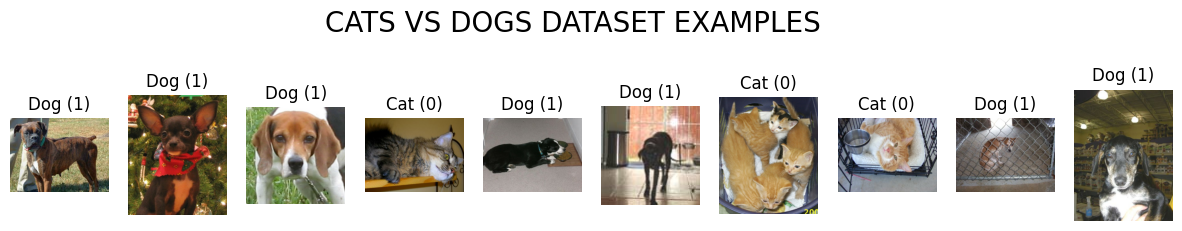


--- ECG5000 Data ---
ECG5000 DATA DIMENSIONS: (4998, 141) (Count, Features)


C:\Users\tayfa\AppData\Local\Temp\ipykernel_3208\4068017849.py:85: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


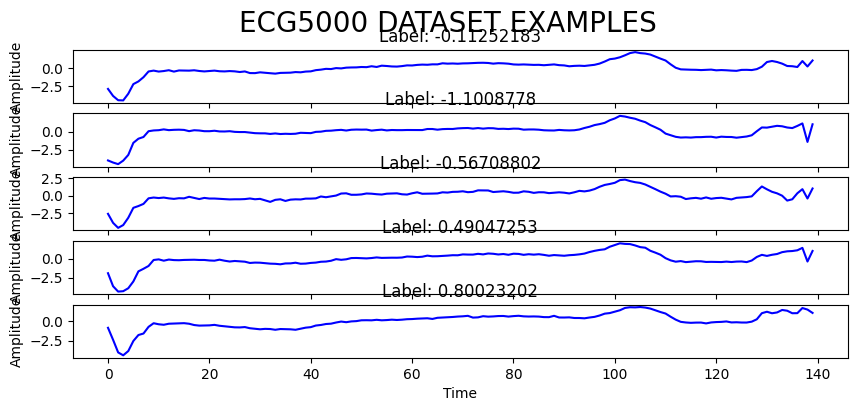

In [6]:
plt.rcParams['figure.figsize'] = (10, 2)
plt.rcParams['image.cmap'] = 'gray'

print("\n--- MNIST DATA ---")
(mnist_x_train, mnist_y_train), _ = keras.datasets.mnist.load_data()
print(f"MNIST DATA DIMENSIONS: {mnist_x_train.shape} (Count, Height, Width)")

plt.figure(figsize=(10, 2))
plt.suptitle("MNIST DATASET EXAMPLES", fontsize=20)
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(mnist_x_train[i])
    plt.title(f"Label: {mnist_y_train[i]}")
    plt.axis('off')
plt.show()


print("\n--- CIFAR-10 DATA ---")
(cifar10_x_train, cifar10_y_train), _ = keras.datasets.cifar10.load_data()
print(f"CIFAR-10 DATA DIMENSIONS: {cifar10_x_train.shape} (Count, Height, Width, Channels)")

plt.figure(figsize=(15, 3))
plt.suptitle("CIFAR-10 DATASET EXAMPLES", fontsize=20)
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(cifar10_x_train[i])
    label_index = cifar10_y_train[i][0]
    plt.title(f"Label: {label_index}")
    plt.axis('off')
plt.show()


print("\n--- CIFAR-100 DATA ---")
(cifar100_x_train, cifar100_y_train), _ = keras.datasets.cifar100.load_data()
print(f"CIFAR-100 DATA DIMENSIONS: {cifar100_x_train.shape} (Count, Height, Width, Channels)")
                                                            # 50000, 32, 32, 3 (100 class)
plt.figure(figsize=(15, 3)) 
plt.suptitle("CIFAR-100 DATASET EXAMPLES", fontsize=20)
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(cifar100_x_train[i])
    label_index = cifar100_y_train[i][0]
    plt.title(f"Label: {label_index}")
    plt.axis('off')
plt.show()


print("\n--- Cats vs Dogs DATA ---")
ds_cats_dogs, ds_info = tfds.load(
    'cats_vs_dogs',
    split='train[:10]',
    with_info=True,
    as_supervised=True,
)
print(f"Cats vs Dogs DATASET: {ds_info.name}")
print(f"Labels: {ds_info.features['label'].names}") # 0=cat, 1=dog

plt.figure(figsize=(15, 3))
plt.suptitle("CATS VS DOGS DATASET EXAMPLES", fontsize=20)
i = 0

for image, label in ds_cats_dogs:
    plt.subplot(1, 10, i + 1)
    plt.imshow(image)
    label_name = "Dog" if label == 1 else "Cat"
    plt.title(f"{label_name} ({label})")
    plt.axis('off')
    i += 1
plt.show()


print("\n--- ECG5000 Data ---")
csv_url = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
dataframe = pd.read_csv(csv_url, header=None)
raw_data = dataframe.values
print(f"ECG5000 DATA DIMENSIONS: {raw_data.shape} (Count, Features)")
plt.figure(figsize=(10, 4))
plt.suptitle("ECG5000 DATASET EXAMPLES", fontsize=20)
for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.plot(raw_data[i, 1:], color='blue')
    plt.title(f"Label: {raw_data[i, 0]}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()



Activation Functions

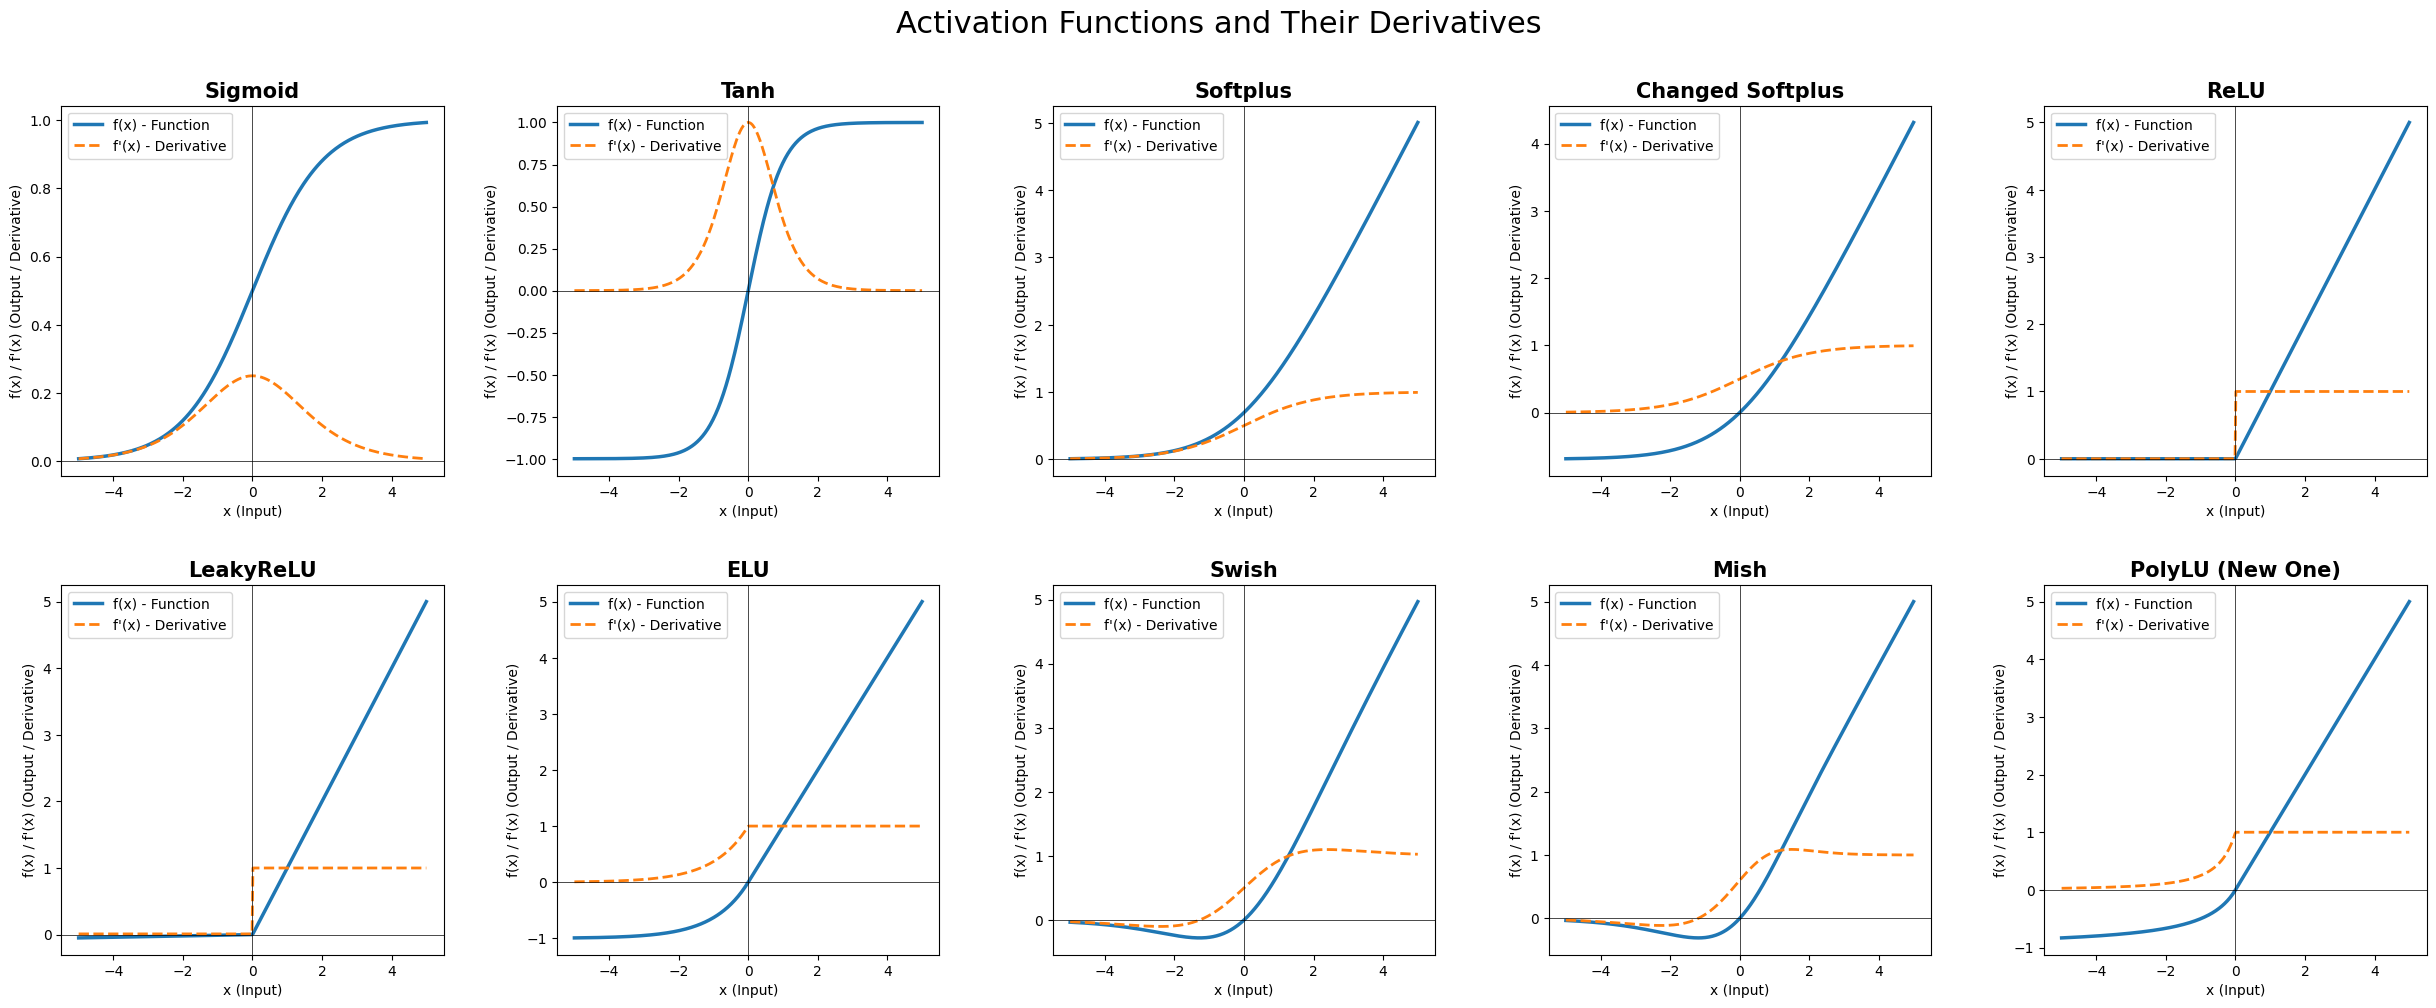

In [ ]:
def F_Sigmoid_to_Plot(x):
    return 1 / (1 + np.exp(-x))

def F_Tanh_to_Plot(x):
    return np.tanh(x)

def FSoftplus_to_Plot(x):
    return np.log(1 + np.exp(x))

#It is suggested in the softplus part. To make softplus output zero at x=0.
def F_ChangedSoftplus_to_Plot(x):
    return np.log(1 + np.exp(x)) - np.log(2)

def F_ReLU_to_Plot(x):
    return np.maximum(0, x)

def F_LeakyReLU_to_Plot(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

def F_ELU_to_Plot(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def F_Swish_to_Plot(x):
    return x * (1 / (1 + np.exp(-x)))

def F_Mish_to_Plot(x):
    softplus = np.log(1 + np.exp(x))
    return x * np.tanh(softplus)

def F_PolyLU_to_Plot(x):
    return np.where(x >= 0, x, (1 / (1 - x)) - 1)


def F_Sigmoid_Derivative_to_Plot(x):
    fx = 1 / (1 + np.exp(-x))
    return fx * (1 - fx)

def F_Tanh_Derivative_to_Plot(x):
    fx = np.tanh(x)
    return 1 - fx**2

def F_Softplus_Derivative_to_Plot(x):
    return 1 / (1 + np.exp(-x))

def F_ChangedSoftplus_Derivative_to_Plot(x):
    return 1 / (1 + np.exp(-x))

def F_ReLU_Derivative_to_Plot(x):
    return np.where(x >= 0, 1, 0)

def F_LeakyReLU_Derivative_to_Plot(x, alpha=0.01):
    return np.where(x >= 0, 1, alpha)

def F_ELU_Derivative_to_Plot(x, alpha=1.0):
    fx = np.where(x >= 0, x, alpha * (np.exp(x) - 1))
    return np.where(x >= 0, 1, fx + alpha)

def F_Swish_Derivative_to_Plot(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid + x * sigmoid * (1 - sigmoid)

def F_Mish_Derivative_to_Plot(x):
    softplus = np.log(1 + np.exp(x))
    tanh_sp = np.tanh(softplus)
    sech_sp = 1 - tanh_sp**2
    sigmoid = 1 / (1 + np.exp(-x))
    return tanh_sp + x * sech_sp * sigmoid

def F_PolyLU_Derivative_to_Plot(x):
    return np.where(x >= 0, 1, 1 / ((1 - x)**2))



# Plotting

x = np.linspace(-5.0, 5.0, 400)

functions_to_plot = [
    ('Sigmoid', F_Sigmoid_to_Plot, F_Sigmoid_Derivative_to_Plot, {}),
    ('Tanh', F_Tanh_to_Plot, F_Tanh_Derivative_to_Plot, {}),
    ('Softplus', FSoftplus_to_Plot, F_Softplus_Derivative_to_Plot, {}),
    ('Changed Softplus', F_ChangedSoftplus_to_Plot, F_ChangedSoftplus_Derivative_to_Plot, {}),
    ('ReLU', F_ReLU_to_Plot, F_ReLU_Derivative_to_Plot, {}),
    ('LeakyReLU', F_LeakyReLU_to_Plot, F_LeakyReLU_Derivative_to_Plot, {'alpha': 0.01}),
    ('ELU', F_ELU_to_Plot, F_ELU_Derivative_to_Plot, {'alpha': 1.0}),
    ('Swish', F_Swish_to_Plot, F_Swish_Derivative_to_Plot, {}),
    ('Mish', F_Mish_to_Plot, F_Mish_Derivative_to_Plot, {}),
    ('PolyLU (New One)', F_PolyLU_to_Plot, F_PolyLU_Derivative_to_Plot, {}),
]

fig, axes = plt.subplots(2, 5, figsize=(25, 10))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_func = colors[0]
color_prime = colors[1]

for ax, (title, func, prime_func, params) in zip(axes.flatten(), functions_to_plot):
    
    y_func = func(x, **params)
    ax.plot(x, y_func, label='f(x) - Function', color=color_func, linewidth=2.5)
    
    y_prime = prime_func(x, **params)
    ax.plot(x, y_prime, label="f'(x) - Derivative", color=color_prime, linestyle='--', linewidth=2.0)
    
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_xlabel('x (Input)')
    ax.set_ylabel('f(x) / f\'(x) (Output / Derivative)')


        
    ax.axhline(0, color='black', linewidth=0.5, linestyle='-')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='-')
    ax.legend(loc='upper left')

plt.tight_layout(pad=3.0)
plt.suptitle('Activation Functions and Their Derivatives', fontsize=22, y=1.03)
plt.show()

Defining the Activastion Functions to Keras API

In [2]:
@tf.keras.utils.register_keras_serializable(package="Custom", name="F_Sigmoid")
def F_Sigmoid(x):
    return tf.math.sigmoid(x)

@tf.keras.utils.register_keras_serializable(package="Custom", name="F_Tanh")
def F_Tanh(x):
    return tf.math.tanh(x)

@tf.keras.utils.register_keras_serializable(package="Custom", name="F_Softplus")
def F_Softplus(x):
    return tf.math.softplus(x)

@tf.keras.utils.register_keras_serializable(package="Custom", name="F_ChangedSoftplus")
def F_ChangedSoftplus(x):
    return tf.math.softplus(x) - tf.math.log(2.0)

@tf.keras.utils.register_keras_serializable(package="Custom", name="F_ReLU")
def F_ReLU(x):
    return tf.nn.relu(x)

@tf.keras.utils.register_keras_serializable(package="Custom", name="F_LeakyReLU")
def F_LeakyReLU(x):
    return tf.nn.leaky_relu(x, alpha=0.01)

@tf.keras.utils.register_keras_serializable(package="Custom", name="F_ELU")
def F_ELU(x):
    return tf.nn.elu(x, alpha=1.0)

@tf.keras.utils.register_keras_serializable(package="Custom", name="F_Swish")
def F_Swish(x):
    return tf.nn.swish(x)

@tf.keras.utils.register_keras_serializable(package="Custom", name="F_Mish")
def F_Mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))


@tf.keras.utils.register_keras_serializable(package="Custom", name="F_PolyLU")
@tf.custom_gradient
def F_PolyLU(x):
    # forward pass nan safe
    positive_part = tf.nn.relu(x)
    negative_part = tf.where(
        x < 0.0,
        (1.0 / (1.0 - x)) - 1.0,
        0.0
    )
    y = positive_part + negative_part

    # backward pass nan safe
    def grad(dy):
        derivative = tf.where(
            x < 0.0,
            1.0 / tf.square(1.0 - x),
            1.0
        )
        
        return dy * derivative
    
    return y, grad